# Sign Language MNIST & Making Your Own Gesture Recongition CNN

![alt text](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/amer_sign2.png "Amer Sign")




In [1]:
# Load our libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get our Training and Test Data
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [3]:
# Inspect our Training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Get our training labels
labels = train['label'].values

In [5]:
# View the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

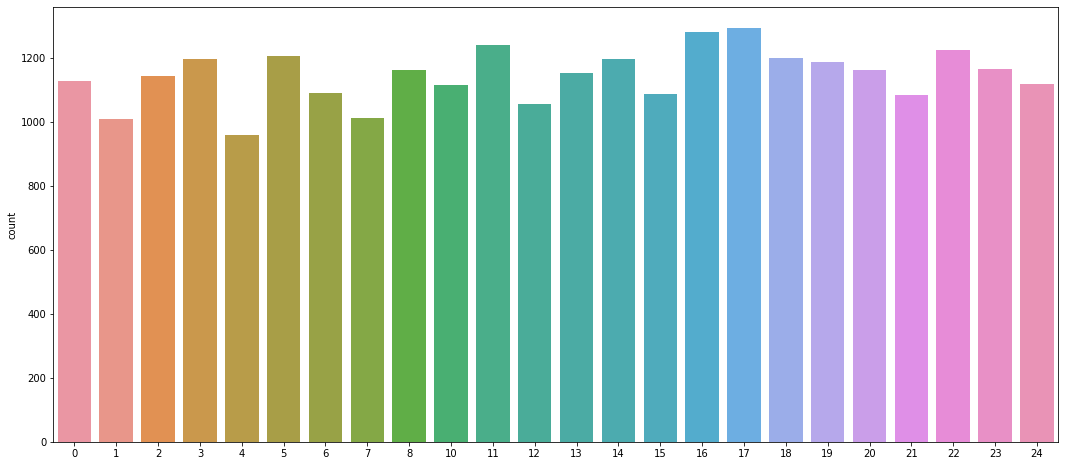

In [6]:
# Plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [7]:
# Drop Training Labels from our training data so we can separate it 
train.drop('label', axis = 1, inplace = True)

In [8]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [12]:
# View our labels
labels
# len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


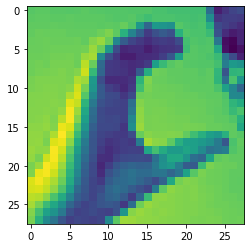

In [13]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [32]:
# Use OpenCV to view 10 random images from our training data
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [15]:
# Split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [16]:
# Start loading our tensorFlow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [17]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255

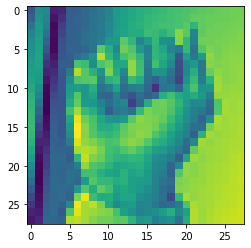

In [18]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [19]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [21]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [23]:
# Train our Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 25s 1ms/sample - loss: 2.6504 - accuracy: 0.1905 - val_loss: 1.5438 - val_accuracy: 0.5225
Epoch 2/10
19218/19218 [==============================] - 24s 1ms/sample - loss: 1.2183 - accuracy: 0.5937 - val_loss: 0.8295 - val_accuracy: 0.7368
Epoch 3/10
19218/19218 [==============================] - 22s 1ms/sample - loss: 0.7246 - accuracy: 0.7559 - val_loss: 0.4517 - val_accuracy: 0.8645
Epoch 4/10
19218/19218 [==============================] - 23s 1ms/sample - loss: 0.4718 - accuracy: 0.8392 - val_loss: 0.2977 - val_accuracy: 0.9055
Epoch 5/10
19218/19218 [==============================] - 24s 1ms/sample - loss: 0.3102 - accuracy: 0.8957 - val_loss: 0.1765 - val_accuracy: 0.9496
Epoch 6/10
19218/19218 [==============================] - 23s 1ms/sample - loss: 0.2038 - accuracy: 0.9353 - val_loss: 0.1267 - val_accuracy: 0.9701
Epoch 7/10
19218/19218 [==============================] -

In [24]:
# Save our Model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


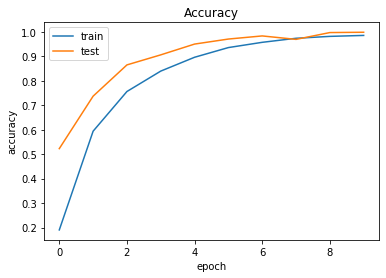

In [25]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [26]:
# Reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [27]:
# Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.807585052983826

In [28]:
# Create function to match label to letter
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

# Test on Actual Webcam Input

In [31]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    ##############################
    frame=cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 

    result = str(model.predict_classes(roi, 1, verbose = 0)[0])
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows() 

## Performance is less than adequate because our training data is very different from our real life data

Let's create our own dataset using your webcam!

In [35]:
# Create a function to setup the directories we'll be storing our images
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

## Let's use OpenCV to Build our Dataset

In [40]:
import cv2
import os

cap = cv2.VideoCapture(0)

i=0
image_count = 0
    
while i < 7:

    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)

    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    if i == 0:
        image_count = 0
        cv2.putText(copy, "Hit Enter to Record when ready", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 1:
        image_count+=1
        cv2.putText(copy, "Recording 1st gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_one = './handgestures/train/0/'
        makedir(gesture_one)
        cv2.imwrite(gesture_one + str(image_count) + ".jpg", roi)
    if i == 2:
        image_count+=1
        cv2.putText(copy, "Recording 1st gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_one = './handgestures/test/0/'
        makedir(gesture_one)
        cv2.imwrite(gesture_one + str(image_count) + ".jpg", roi)
    if i == 3:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 2nd gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 4:
        image_count+=1
        cv2.putText(copy, "Recording 2nd gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = './handgestures/train/1/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 5:
        image_count+=1
        cv2.putText(copy, "Recording 2nd gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = './handgestures/test/1/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 6:
        cv2.putText(copy, "Hit Enter to Exit", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    cv2.imshow('frame', copy)    

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        image_count = 0
        i+=1

cap.release()
cv2.destroyAllWindows() 

## Let's use Keras's Data Augmentation to enhance our dataset

In [41]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

num_classes = 2
img_rows, img_cols = 28, 28
batch_size = 32

train_data_dir = './handgestures/train'
validation_data_dir = './handgestures/test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        color_mode = 'grayscale',
        class_mode='binary')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        color_mode = 'grayscale',
        class_mode='binary')

Found 1206 images belonging to 2 classes.
Found 301 images belonging to 2 classes.


### Creating our Model

In [42]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

### Training our Model

In [43]:
# We use a very small learning rate 
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

nb_train_samples = 1206 
nb_validation_samples = 301 
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 37 steps, validate for 9 steps
Epoch 1/10
37/37 [==============================] - 11s 301ms/step - loss: 0.6899 - accuracy: 0.5537 - val_loss: 0.7371 - val_accuracy: 0.4306
Epoch 2/10
37/37 [==============================] - 3s 81ms/step - loss: 0.6555 - accuracy: 0.6422 - val_loss: 0.5829 - val_accuracy: 0.7708
Epoch 3/10
37/37 [==============================] - 3s 82ms/step - loss: 0.6035 - accuracy: 0.7027 - val_loss: 0.5770 - val_accuracy: 0.7569
Epoch 4/10
37/37 [==============================] - 3s 82ms/step - loss: 0.5827 - accuracy: 0.6917 - val_loss: 0.6388 - val_accuracy: 0.6910
Epoch 5/10
37/37 [==============================] - 3s 81ms/step - loss: 0.5321 - accuracy: 0.7462 - val_loss: 0.3742 - val_accuracy: 0.8576
Epoch 6/10
37/37 [==============================] - 3s 79ms/step - loss: 0.5258 - accuracy: 0.7453 - val_loss: 0.3522 - val_accuracy: 0.8333
Epoch 7/10
37/37 [==============================] - 4s 102ms/

In [44]:
# Save our Model
model.save("my_gestures_cnn.h5")

In [45]:
from tensorflow.keras.models import load_model

classifier = load_model('my_gestures_cnn.h5')

## Now let's test the model we just built!

In [46]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    ##############################
    frame=cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 
    roi = roi/255
    result = str(classifier.predict_classes(roi, 1, verbose = 0)[0])
    cv2.putText(copy, str(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows() 

In [112]:
cap.release()
cv2.destroyAllWindows() 